# Corporate Credit Rating Prediction

Is it possible to predict the credit rating of a company with its financial Ratios?



## The Dataset

- **Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, daysOfInventoryOutstanding, operatingCycle, daysOfPayablesOutstanding, cashConversionCycle

- **Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, netIncomePerEBT, ebtPerEbit, ebitPerRevenue

- **Debt Ratios**: debtRatio, debtEquityRatio, longTermDebtToCapitalization, totalDebtToCapitalization, interestCoverage, cashFlowToDebtRatio, companyEquityMultiplier

- **Operating Performance Ratios**: receivablesTurnover, payablesTurnover, inventoryTurnover, fixedAssetTurnover, assetTurnover Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, payoutRatio, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio, cashFlowCoverageRatios, shortTermCoverageRatios, capitalExpenditureCoverageRatio, dividendPaidAndCapexCoverageRatio, dividendPayoutRatio, 


#### Import Libraries

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

## Data Exploration

In [314]:
df_rating = pd.read_csv('data/rating_dataframe.csv')

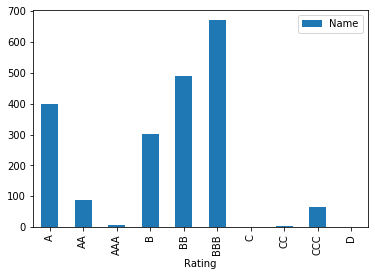

In [315]:
df_rating_summary = df_rating.groupby('Rating').count().reset_index()
df_rating_summary.plot.bar(x='Rating', y='Name')

It is better to join all the A's together. 

In [316]:
df_rating.loc[df_rating['Rating'] == 'AA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'AAA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'CC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'CCC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'D','Rating'] = 'C'

### EDA

In [317]:
df_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718,-0.085374
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588,40.443603
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,-1735.047170
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912,0.000000
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722,0.212845
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892,0.465593
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,412.136640


In [318]:
skewValue = df_rating.skew(axis=0)
skewValue

currentRatio                          34.338889
quickRatio                            30.925641
cashRatio                             27.098772
daysOfSalesOutstanding                20.399567
netProfitMargin                       17.619910
pretaxProfitMargin                    22.096334
grossProfitMargin                    -14.203446
operatingProfitMargin                 26.493892
returnOnAssets                       -32.112571
returnOnCapitalEmployed              -33.318531
returnOnEquity                        31.702500
assetTurnover                         26.020347
fixedAssetTurnover                    26.120457
debtEquityRatio                        0.268993
debtRatio                              1.285251
effectiveTaxRate                      32.308742
freeCashFlowOperatingCashFlowRatio   -22.913129
freeCashFlowPerShare                  33.677207
cashPerShare                          34.025861
companyEquityMultiplier                0.269093
ebitPerRevenue                        22

#### Log conversion

In [319]:
from sklearn import preprocessing

In [320]:
columns = df_rating.columns[6:]

In [321]:
min_max_scaler = preprocessing.MinMaxScaler()

for c in columns:
    
    float_array = df_rating[[c]].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_array = min_max_scaler.fit_transform(float_array) + 0.1
    df_rating[c] = scaled_array
    df_rating[c + 'log'] = df_rating[c].apply(np.log)

#### Remove Outlieres

In [322]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.01)
    q3 = df_in[col_name].quantile(0.99)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [323]:
for c in df_rating.columns[32:58]:
    df_rating = remove_outlier(df_rating, c)

#### Plot Distributions 

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


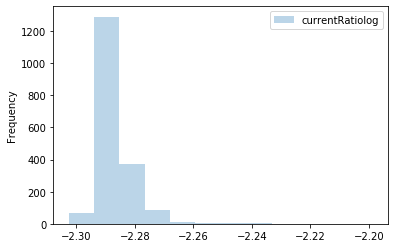

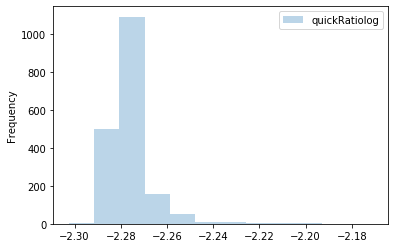

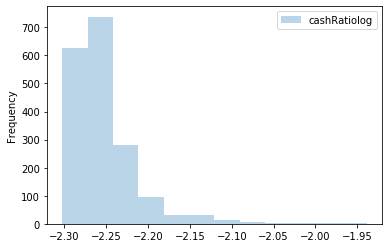

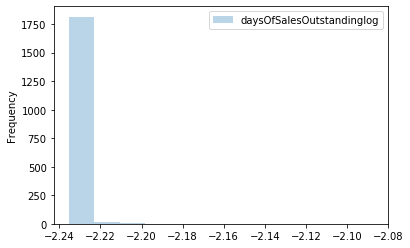

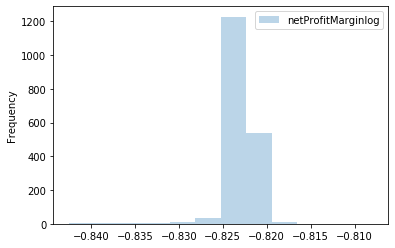

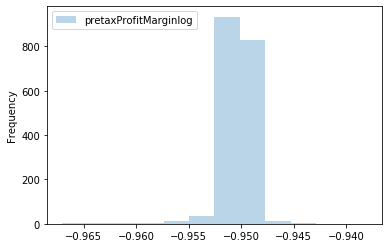

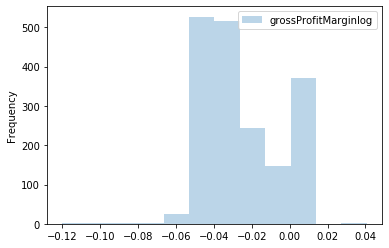

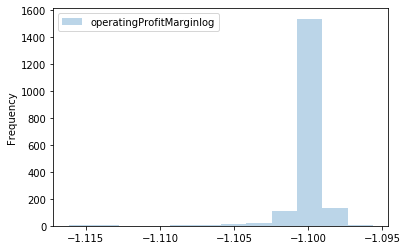

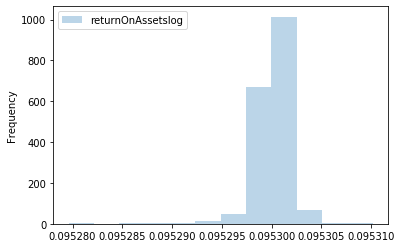

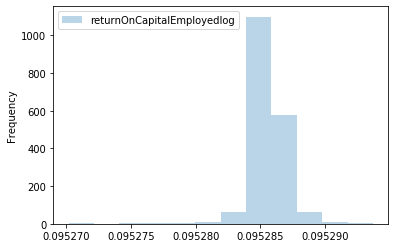

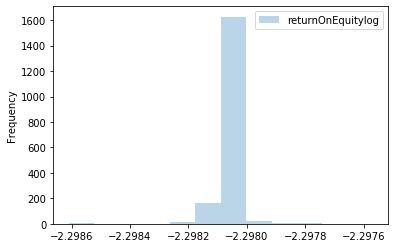

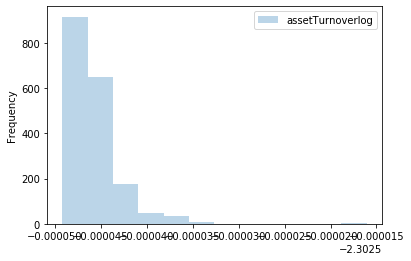

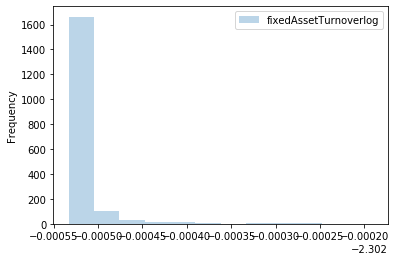

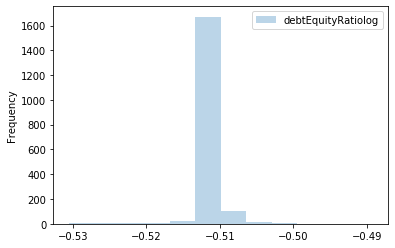

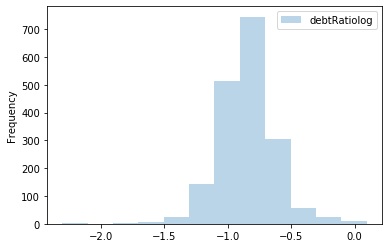

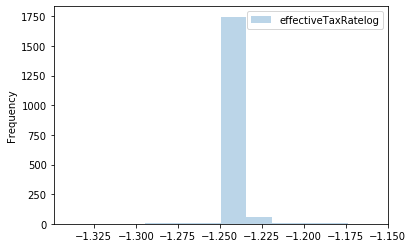

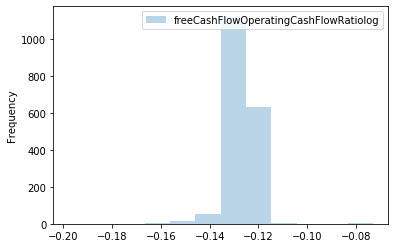

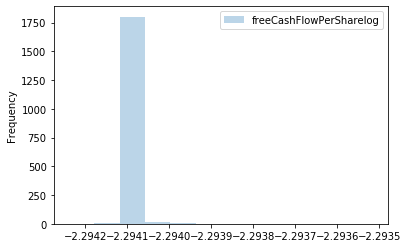

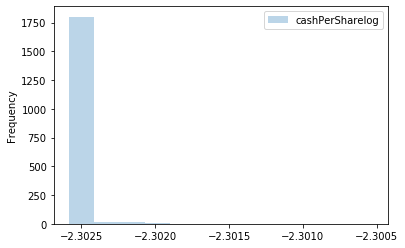

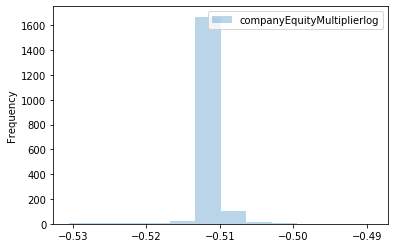

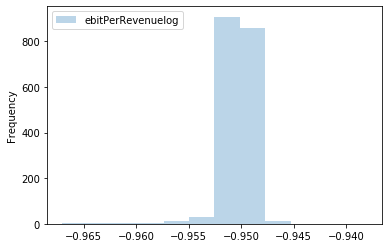

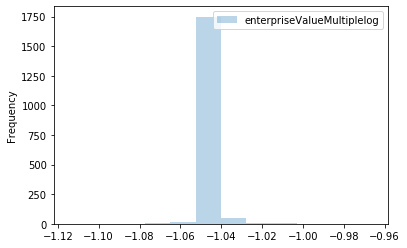

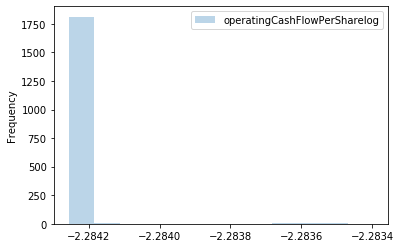

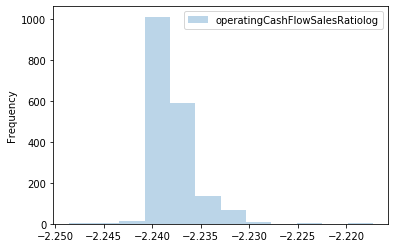

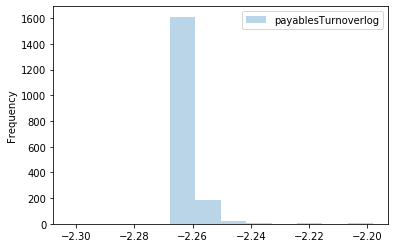

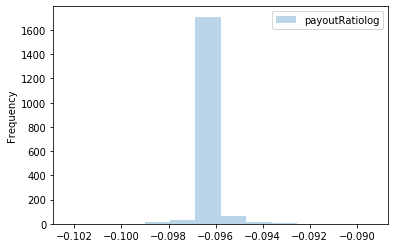

In [324]:
for c in df_rating.columns[32:58]:
    df_rating.loc[:, [c]].plot.hist(bins=12, alpha=0.3)


Index(['currentRatiolog', 'quickRatiolog', 'cashRatiolog',
       'daysOfSalesOutstandinglog', 'netProfitMarginlog',
       'pretaxProfitMarginlog', 'grossProfitMarginlog',
       'operatingProfitMarginlog', 'returnOnAssetslog',
       'returnOnCapitalEmployedlog', 'returnOnEquitylog', 'assetTurnoverlog',
       'fixedAssetTurnoverlog', 'debtEquityRatiolog', 'debtRatiolog',
       'effectiveTaxRatelog', 'freeCashFlowOperatingCashFlowRatiolog',
       'freeCashFlowPerSharelog', 'cashPerSharelog',
       'companyEquityMultiplierlog', 'ebitPerRevenuelog',
       'enterpriseValueMultiplelog', 'operatingCashFlowPerSharelog',
       'operatingCashFlowSalesRatiolog', 'payablesTurnoverlog',
       'payoutRatiolog', 'color'],
      dtype='object')

In [143]:
df_rating.colors = 'a'
df_rating.loc[df_rating['Rating'] == 'A', 'color'] = 'r'
df_rating.loc[df_rating['Rating'] == 'B', 'color'] = 'g'
df_rating.loc[df_rating['Rating'] == 'BB', 'color'] = 'b'
df_rating.loc[df_rating['Rating'] == 'BBB','color'] = 'y'
df_rating.loc[df_rating['Rating'] == 'C', 'color'] = 'm'

# PCA

In [332]:
df_rating.columns

Index(['Rating', 'Name', 'Symbol', 'Sector', 'Rating Agency Name', 'Date',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover', 'payoutRatio',
       'currentRatiolog', 'quickRatiolog', 'cashRatiolog',
       'daysOfSalesOutstandinglog', 'netProfitMarginlog',
       'pretaxProfitMarginlog', 'grossProfitMarginlog',
       'operatingProfitMarginlog', 'returnOnAssetslog',
       'returnOnCapitalEmployedlog', 'returnOnEquitylog', 'assetTurnoverlog',


In [333]:
from sklearn.preprocessing import StandardScaler

In [334]:
features = df_rating.columns[30:len(df_rating.columns)-1]

# Separating out the features
x = df_rating.loc[:, features].values
# Separating out the target
y = df_rating.loc[:,['Rating']].values
# Standardizing the features
# x = StandardScaler().fit_transform(x)

In [335]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2','pca3','pca4','pca5'])

In [336]:
finalDf = pd.concat([principalDf, df_rating[['Rating']]], axis = 1)

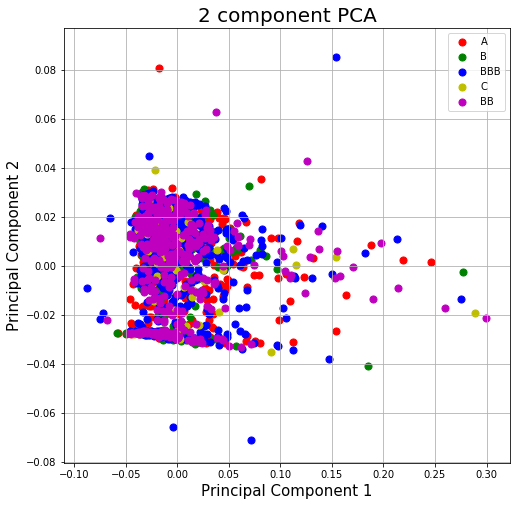

In [337]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(df_rating.Rating))
colors = ['r', 'g', 'b','y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca2'], 
               finalDf.loc[indicesToKeep, 'pca3'], 
               c = color, 
               s = 50)

ax.legend(targets)
ax.grid()

In [339]:
sum(pca.explained_variance_ratio_)

0.9976016354160178

In [340]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#### Train and Test

In [341]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = finalDf.iloc[:,:5], finalDf.iloc[:,5]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [343]:
from sklearn.linear_model import LogisticRegression
# X_train, y_test = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0 , multi_class='multinomial', solver='newton-cg')
model = clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [344]:
model.predict(y_test)

ValueError: could not convert string to float: 'BB'

# Random Forest

In [345]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df_rating.iloc[:,6:27], df_rating.iloc[:,0]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [207]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.49014778325123154


### LDA

In [217]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [218]:
y_pred=clf.predict(X_test)

In [219]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3694581280788177


In [221]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
y_pred=clf.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [222]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2857142857142857


# KNN

In [224]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [225]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.29802955665024633


# New Test Regression

#### Train and Test

In [326]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df_rating.iloc[:,31:49], df_rating.iloc[:,0]

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
y_pred=clf.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [329]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.41032608695652173


In [330]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [331]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.33967391304347827
